In [1]:
%reset -f

import sys
import os
import bz2
import csv
import pandas as pd
import ast
# import json
import ujson
import numpy as np
import pickle
import matplotlib.pyplot as plt

dir_data = "Z:/04_Daten/MOT17/train/MOT17-04-FRCNN/det"
dir_test = "C:/Users/ev2752/Documents/OTVision/OTVision_fork/MA/test"

with open(dir_data + '/det.txt') as MOTFile:
    detections = pd.DataFrame(MOTFile.readlines()).reset_index()


detections = detections.rename(columns={0: 'temp'})
detections[['frame', 'KA', 'x', 'y', 'w', 'h', 'confidence']] = detections['temp'].str.split(',', expand=True).reset_index(drop=True)
del detections['temp'], detections['KA']

detections['frame'] = detections['frame'].astype('int')
detections['x'] = detections['x'].astype('float64') * (1/1980)
detections['y'] = detections['y'].astype('float64') * (1/1080)
detections['w'] = detections['w'].astype('float64') * (1/1980)
detections['h'] = detections['h'].astype('float64') * (1/1080)
detections['confidence'] = detections['confidence'].astype('float64')
lines = detections.sort_values(by='frame').reset_index(drop=True)
lines['class'] = 'other'



## Dictionary anlegen und .otdet exportieren

In [6]:
converted_dict = {}
for index, row in detections.iterrows():
    frame = str(row['frame'])
    if frame not in converted_dict:
        converted_dict[frame] = {
            "dets": [],
            "occurrence": row['frame']
        }
    dets = {
        "class": row["class"],
        "confidence": row["confidence"],
        "x": row["x"],
        "y": row["y"],
        "w": row["w"],
        "h": row["h"]
    }
    converted_dict[frame]["dets"].append(dets)

converted_dict = {"metadata": {
        "otdet_version": "1.3",
        "video": {
            "filename": "OTCamera07_FR20_2023-09-19_17-00-00_Sued",
            "filetype": ".mp4",
            "width": 800,
            "height": 450,
            "expected_duration": 42,
            "recorded_fps": 30.0,
            "actual_fps": 30.0,
            "number_of_frames": 1260,
            "recorded_start_date": 1695142800.0,
            "length": "0:15:00.150000"
        },
        "detection": {
            "otvision_version": "0.0",
            "model": {
                "name": "YOLOv8",
                "weights": "\/home\/jonas\/platomo_drive\/platomo_data\/Produkte\/OpenTrafficCam\/OTLabels\/Modelle\/OTCv1-2_yolov8l_T30_batch2_3.pt",
                "iou_threshold": 0.45,
                "image_size": 640,
                "max_confidence": 0.25,
                "half_precision": 'false',
                "classes": {
                    "0": "pedestrian",
                    "1": "bicyclist",
                    "2": "car",
                    "3": "motorcyclist",
                    "4": "private_van",
                    "5": "bus",
                    "6": "train",
                    "7": "truck",
                    "8": "scooter_driver",
                    "9": "cargo_bike_driver",
                    "10": "bicyclist_with_trailer",
                    "11": "car_with_trailer",
                    "12": "private_van_with_trailer",
                    "13": "truck_with_trailer",
                    "14": "delivery_van",
                    "15": "delivery_van_with_trailer",
                    "16": "truck_with_semitrailer",
                    "17": "other"
                }
            },
            "chunksize": 1,
            "normalized_bbox": 'false'
        }
    },
                  "data": converted_dict}


print(converted_dict)
with bz2.open(dir_data + '/TEST4.otdet', "wt", encoding='UTF-8') as output:
    # RIchard hat einen Hammer udn eine 14mm-Nuss ausgeliehen
    ujson.dump(converted_dict, output)

{'metadata': {'otdet_version': '1.3', 'video': {'filename': 'OTCamera07_FR20_2023-09-19_17-00-00_Sued', 'filetype': '.mp4', 'width': 800, 'height': 450, 'expected_duration': 42, 'recorded_fps': 30.0, 'actual_fps': 30.0, 'number_of_frames': 1260, 'recorded_start_date': 1695142800.0, 'length': '0:15:00.150000'}, 'detection': {'otvision_version': '0.0', 'model': {'name': 'YOLOv8', 'weights': '\\/home\\/jonas\\/platomo_drive\\/platomo_data\\/Produkte\\/OpenTrafficCam\\/OTLabels\\/Modelle\\/OTCv1-2_yolov8l_T30_batch2_3.pt', 'iou_threshold': 0.45, 'image_size': 640, 'max_confidence': 0.25, 'half_precision': 'false', 'classes': {'0': 'pedestrian', '1': 'bicyclist', '2': 'car', '3': 'motorcyclist', '4': 'private_van', '5': 'bus', '6': 'train', '7': 'truck', '8': 'scooter_driver', '9': 'cargo_bike_driver', '10': 'bicyclist_with_trailer', '11': 'car_with_trailer', '12': 'private_van_with_trailer', '13': 'truck_with_trailer', '14': 'delivery_van', '15': 'delivery_van_with_trailer', '16': 'truck_w

## Plotten der Ground Truth

[1920, 1080]


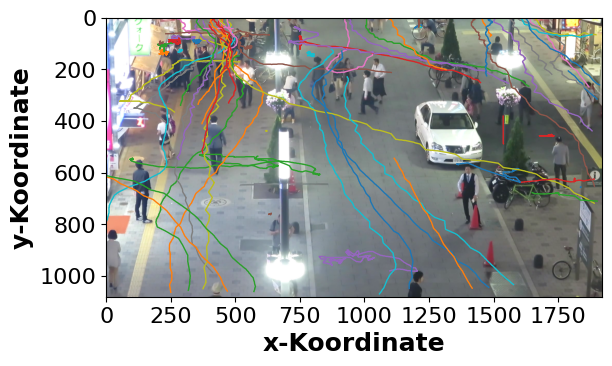

In [2]:
with open('Z:/04_Daten/MOT17/train/MOT17-04-FRCNN/gt/gt.txt') as MOTFile:
    GT = pd.DataFrame(MOTFile.readlines()).reset_index()


GT = GT.rename(columns={0: 'temp'})
cols = ['frame', 'track-id', 'x0', 'y0', 'w', 'h', 'g', 'j', 'conf']
GT[cols] = GT['temp'].str.split(',', expand=True).reset_index(drop=True)
del GT['temp']

GT[cols] = GT[cols].astype('float64')

from scripts.plotfunctions import plot_trajectory


plt.show(plot_trajectory(GT,
                         'Z:/04_Daten/MOT17/train/MOT17-04-FRCNN',
                         fontsize=18,
                         box=[1920, 1080],
                         show_background=True,
                        #  titletext='Trajektorienlängen',
                        #  savename="10a_Trajectories_all"
                        ))

## Plotten ottrk

ottrk_to_txt...
tracklength...
[800, 450]


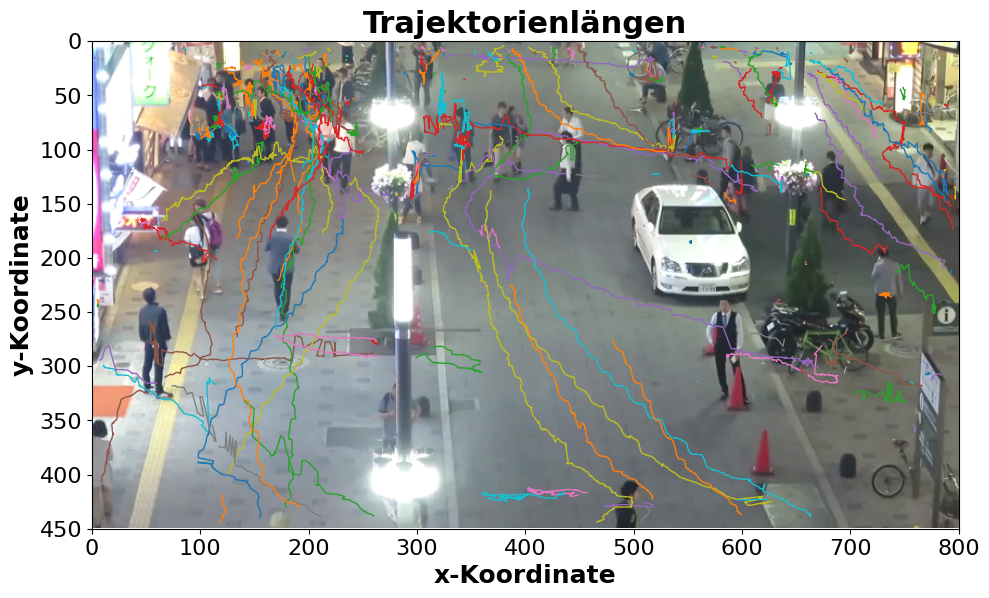

In [5]:
from scripts.plotfunctions import ottrk_to_txt
from scripts.plotfunctions import plot_BBoxes
from scripts.plotfunctions import tracklength
from scripts.plotfunctions import plot_trajectory
from scripts.plotfunctions import plot_histogram

dirpath = "Z:/04_Daten/MOT17/train/MOT17-04-FRCNN"
filename = "2024-03-29_20-00-00_MOT17_04_FCRNN_resized"
fileending = '.ottrk'
filepath = os.path.join(dirpath, filename) + fileending

OTCdetections, metadata = ottrk_to_txt(filepath = filepath, export=False)
# plt.show(plot_BBoxes(OTCdetections, dirpath, framerate=20, trackid = 1089))

OTCdetections = OTCdetections.sort_values(by=['track-id', 'frame'])
OTCdetections = tracklength(OTCdetections)

width = metadata.loc['width', 'video']
height = metadata.loc['height', 'video']
box = [width, height]

del width, height


from scripts.plotfunctions import plot_trajectory

data = OTCdetections
plt.show(plot_trajectory(data,
                         dirpath,
                         fontsize=18,
                         box=box,
                         show_background=True,
                         titletext='Trajektorienlängen',
                        #  savename="10a_Trajectories_all"
                        ))